In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import zipfile
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

# open zipped dataset
with zipfile.ZipFile("PregnancyData.zip") as z:
   # open the csv file in the dataset
   with z.open("PregnancyData.csv") as f:
     # read the dataset
      df = pd.read_csv(f)

In [2]:
df.columns[df.isnull().any()]

Index(['Date patient started trying to become pregnant OR date of last pregnancy',
       'Main Reason for Producing Embroys Storing Eggs',
       'Type of Ovulation Induction', 'Egg Donor Age at Registration',
       'Sperm Donor Age at Registration', 'Donated embryo',
       'Patient acting as Surrogate', 'PGD', 'PGD treatment', 'PGS',
       'PGS Treatment', 'Elective Single Embryo Transfer', 'Egg Source',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed',
       'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm',
       'Total Embryos Created', 'Eggs Micro-injected',
       'Embryos from Eggs Micro-injected', 'Total Embryos Thawed',
       'Embryos Transfered', 'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient',
       'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
       'Date of Egg Collection', 'Date of Egg Thawing', 'Date of Egg Mixing',


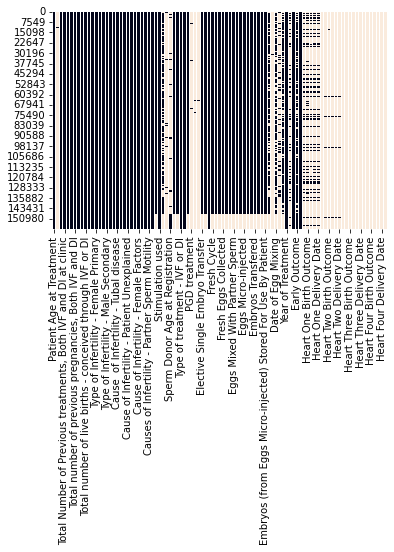

In [3]:
#Heatmap of missing data
sns.heatmap(df.isnull(), cbar=False)

In [4]:
# Getting the list of columns
col = df.columns
  
# Printing Number of columns
print('Original number of columns :', len(col))

# Delete columns containing either 6% or more than 6% NaN Values
perc = 6.0
min_count = int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count, how = 'any')
col_mod = mod_df.columns

# Adding new Embryos Transfered column to mod_df from df
mod_df['Embryos Transfered'] = df['Embryos Transfered']

print('New number of columns :', len(col_mod))
print(mod_df.columns)

Original number of columns : 95
New number of columns : 35
Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infer

In [5]:
# obtaining the shape and size of mod_df after removing and adding columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 36)


Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

In [6]:
for column in df.columns:
    print(column)

Patient Age at Treatment
Date patient started trying to become pregnant OR date of last pregnancy
Total Number of Previous cycles, Both IVF and DI
Total Number of Previous treatments, Both IVF and DI at clinic
Total Number of Previous IVF cycles
Total Number of Previous DI cycles
Total number of previous pregnancies, Both IVF and DI
Total number of IVF pregnancies
Total number of DI pregnancies
Total number of live births - conceived through IVF or DI
Total number of live births - conceived through IVF
Total number of live births - conceived through DI
Type of Infertility - Female Primary
Type of Infertility - Female Secondary
Type of Infertility - Male Primary
Type of Infertility - Male Secondary
Type of Infertility -Couple Primary
Type of Infertility -Couple Secondary
Cause  of Infertility - Tubal disease
Cause of Infertility - Ovulatory Disorder
Cause of Infertility - Male Factor
Cause of Infertility - Patient Unexplained
Cause of Infertility - Endometriosis
Cause of Infertility - C

In [7]:
Add_Col = ['Total Embryos Thawed', 'Egg Source', 'Elective Single Embryo Transfer', 'Fresh Cycle', 
           'Frozen Cycle', 'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm']
Del_Col = ['Total Number of Previous cycles, Both IVF and DI', 'Total Number of Previous treatments, Both IVF and DI at clinic', 
           'Total Number of Previous DI cycles','Total number of previous pregnancies, Both IVF and DI', 'Total number of DI pregnancies', 
           'Total number of live births - conceived through IVF or DI', 'Total number of live births - conceived through DI', 
           'Type of treatment - IVF or DI', 'Year of Treatment','Cause of Infertility - Partner Sperm Concentration', 
           'Cause of Infertility - Female Factors', 'Causes of Infertility - Partner Sperm Motility', 
           'Cause of Infertility -  Partner Sperm Immunological factors', 'Specific treatment type']

In [8]:
# Remove columns that are not needed
for column in df.columns:
  for x in Del_Col:
    if column == x: 
      mod_df.drop(x, axis=1, inplace = True)

# Add columns that are needed
for columns in df.columns:
  for y in Add_Col:
    if columns == y: 
      mod_df[y] = df[columns]


# obtaining the shape and size of mod_df after removing more columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 29)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered',
       'Elective Single Embryo Transfer', 'Eg

In [9]:
print(mod_df.nunique())

Patient Age at Treatment                                 7
Total Number of Previous IVF cycles                      7
Total number of IVF pregnancies                         12
Total number of live births - conceived through IVF      6
Type of Infertility - Female Primary                     2
Type of Infertility - Female Secondary                   2
Type of Infertility - Male Primary                       2
Type of Infertility - Male Secondary                     2
Type of Infertility -Couple Primary                      2
Type of Infertility -Couple Secondary                    2
Cause  of Infertility - Tubal disease                    2
Cause of Infertility - Ovulatory Disorder                2
Cause of Infertility - Male Factor                       2
Cause of Infertility - Patient Unexplained               2
Cause of Infertility - Endometriosis                     2
Cause of Infertility - Cervical factors                  2
Cause of Infertility -  Partner Sperm Morphology        

In [10]:
# Show each unique value in every column
for col in mod_df:
    print(col)
    print(mod_df[col].unique())

Patient Age at Treatment
['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999']
Total Number of Previous IVF cycles
['2' '3' '0' '5' '4' '1' '>=5']
Total number of IVF pregnancies
[0 1 2 4 3 5 '0' '1' '2' '3' '4' '>=5']
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
['Partner' 'Donor' 'not assigned' 'Partner & Donor']
Number of Live Births
[1 0 2 3 4]
Number

In [11]:
mod_df.columns[mod_df.isnull().any()]

Index(['Embryos Transfered', 'Elective Single Embryo Transfer', 'Egg Source',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Mixed With Partner Sperm',
       'Eggs Mixed With Donor sperm', 'Total Embryos Thawed'],
      dtype='object')

In [12]:
# Fixing outliers and errors in data
mod_df['Eggs Mixed With Partner Sperm'].replace({'> 50': 50}, inplace=True)
mod_df['Eggs Mixed With Donor sperm'].replace({'> 50': 50}, inplace=True)
mod_df.drop(mod_df.index[mod_df['Patient Age at Treatment'] == '999'], inplace = True)
mod_df.drop(mod_df.index[mod_df['Number of foetal sacs with fetal pulsation'] == 40], inplace = True)
mod_df.drop(mod_df.index[mod_df['Sperm From'] == 'not assigned'], inplace = True)
mod_df['Patient Age at Treatment'].replace({'40-42': 41, '45-50': 47.5, '35-37': 36, '18 - 34': 26, '43-44': 43.5, '38-39': 38.5}, inplace=True)
mod_df['Total Number of Previous IVF cycles'].replace({'>=5': 6}, inplace=True)
mod_df['Total number of IVF pregnancies'].replace({'>=5': 6}, inplace=True)
mod_df['Egg Source'].replace({'Patient': 0, 'Donor': 1}, inplace=True)

#Replacement for method below
#mod_df['Sperm From'].replace({'Partner': 0, 'Donor': 1, 'Partner & Donor': 2}, inplace=True)
SpermFromPartner = [] 
for s in list(mod_df['Sperm From']):
    if 'Partner' in s:
        SpermFromPartner.append(1)
    else:
        SpermFromPartner.append(0)
SpermFromDonor = [] 
for s in list(mod_df['Sperm From']):
    if 'Donor' in s:
        SpermFromDonor.append(1)
    else:
        SpermFromDonor.append(0)
        
mod_df.insert(len(mod_df.columns), column = "Sperm From Partner", value = SpermFromPartner)
mod_df.insert(len(mod_df.columns), column = "Sperm From Donor", value = SpermFromDonor)
mod_df.drop('Sperm From', axis=1, inplace = True)


for name in mod_df.columns:
  for val in mod_df[name].unique():
    if isinstance(val, str):
      mod_df[name].replace({val: int(val)}, inplace=True)

mod_df.fillna(value=mod_df['Embryos Transfered'].mean().astype(float), inplace=True)
mod_df.fillna(value=mod_df['Eggs Mixed With Partner Sperm'].mean().astype(float), inplace=True)
mod_df.fillna(value=mod_df['Eggs Mixed With Donor sperm'].mean().astype(float), inplace=True)
mod_df.fillna(value=mod_df['Elective Single Embryo Transfer'].mean().astype(float), inplace=True)
mod_df.fillna(value=mod_df['Fresh Cycle'].mean().astype(float), inplace=True)
mod_df.fillna(value=mod_df['Frozen Cycle'].mean().astype(float), inplace=True)
mod_df.fillna(value=mod_df['Total Embryos Thawed'].mean().astype(float), inplace=True)
mod_df.fillna(value=mod_df['Egg Source'].mean().astype(float), inplace=True)

In [13]:
# Checking each unique value in every column
for col_up in mod_df:
    print(col_up)
    print(mod_df[col_up].unique())

Patient Age at Treatment
[41.  47.5 36.  26.  43.5 38.5]
Total Number of Previous IVF cycles
[2 3 0 5 4 1 6]
Total number of IVF pregnancies
[0 1 2 4 3 5 6]
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Number of Live Births
[1 0 2 3 4]
Number of foetal sacs with fetal pulsation
[1 0 2 3 4]
Embryos Transfered
[1.         2.         0.         3.         1.16425844]
Elect

In [14]:
# obtaining the shape and size of mod_df after fixing outliers and errors in data
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (156025, 30)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Number of Live Births', 'Number of foetal sacs with fetal pulsation',
       'Embryos Transfered', 'Elective Single Embryo Transfer', 'Egg Source',
       'Fr

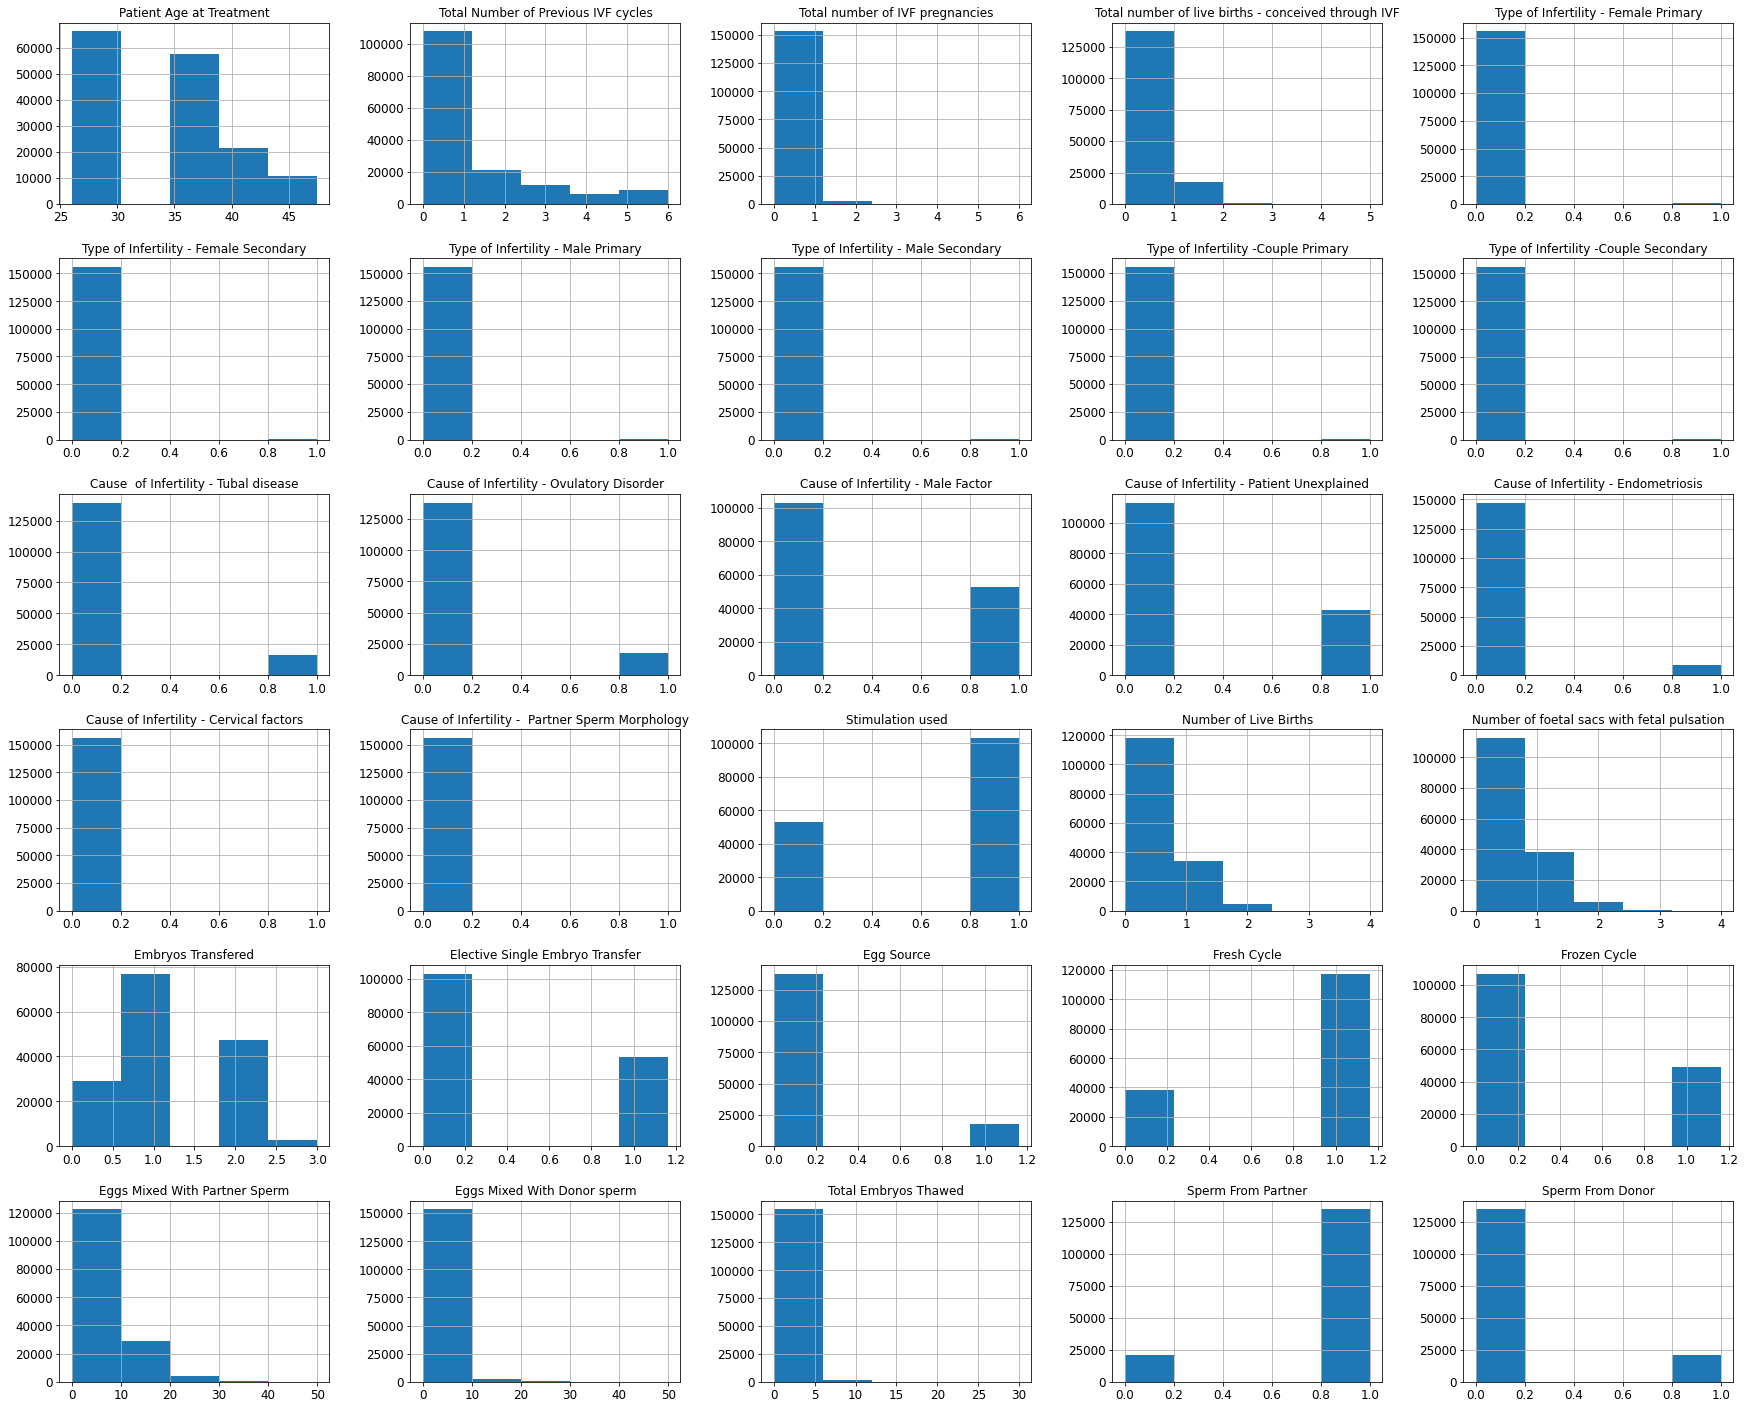

In [15]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mod_df.hist(bins=5, figsize=(30, 25))
plt.show()

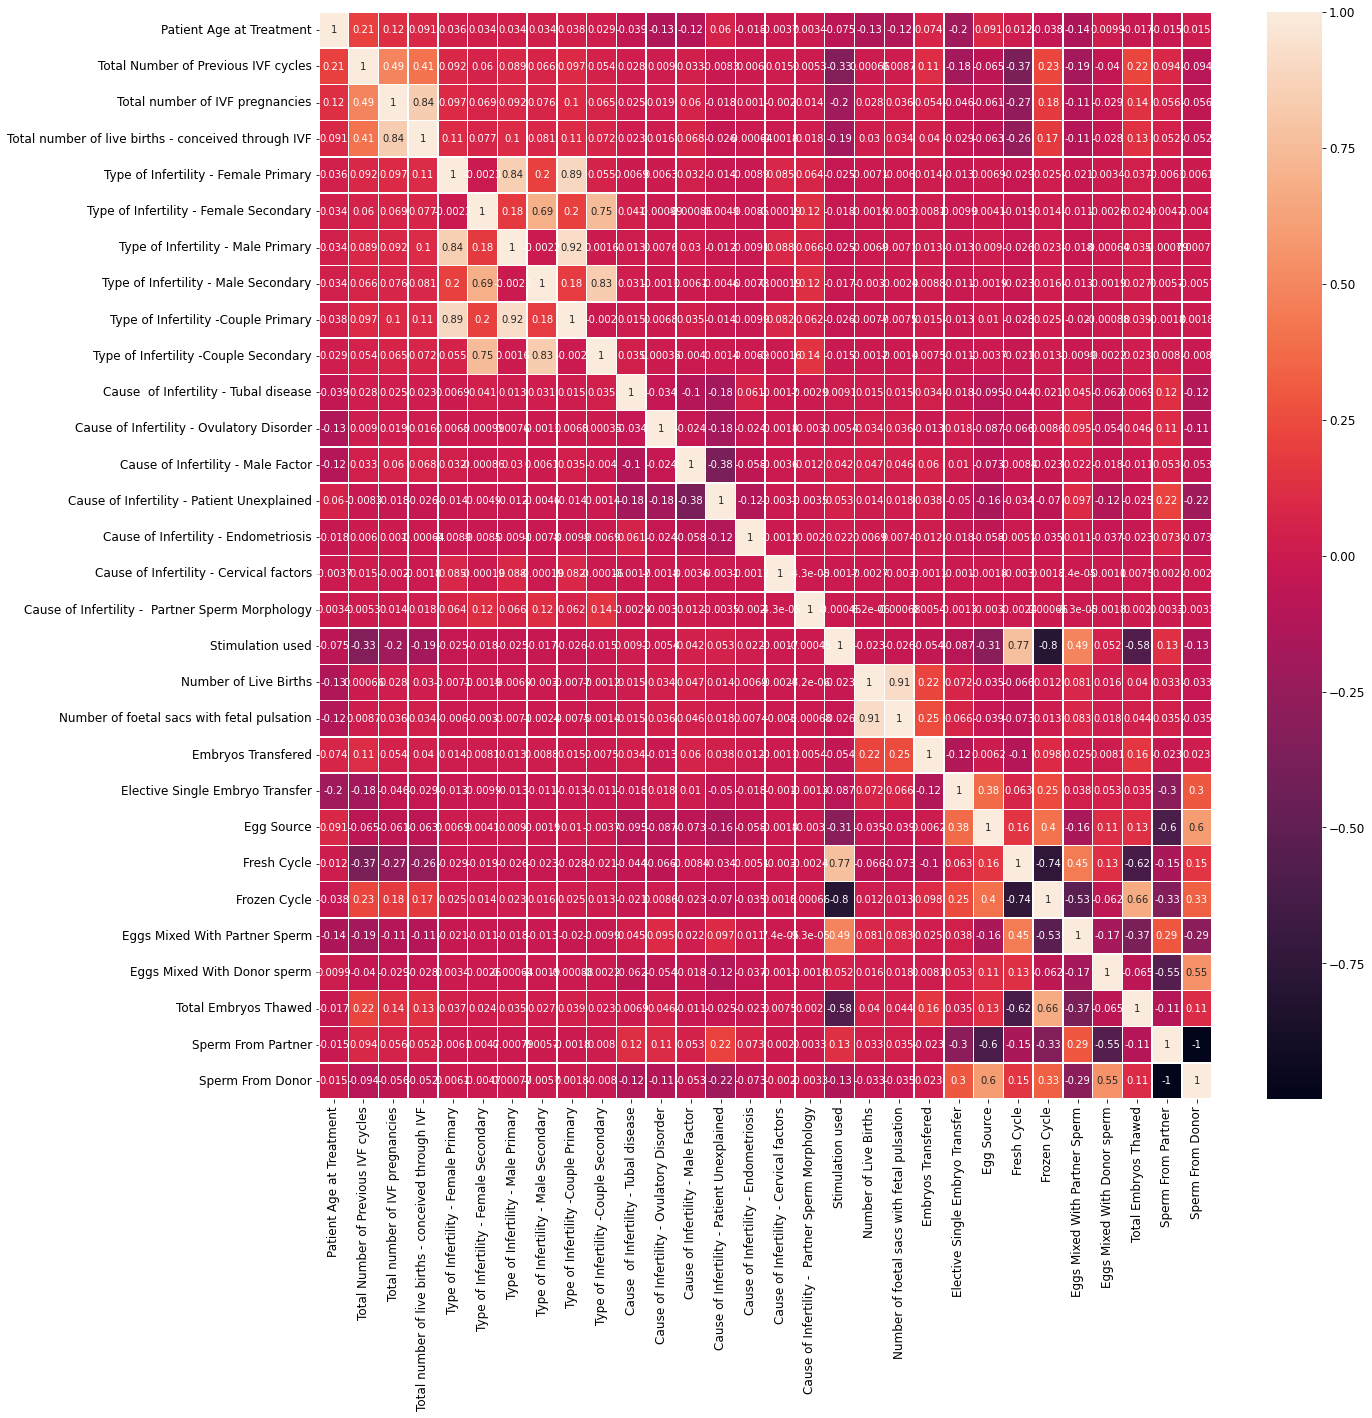

In [16]:
fig, ax = plt.subplots(figsize=(20,20))  # Sample figsize in inches
sns.heatmap(mod_df.corr(), annot=True, linewidths=.5, ax=ax)

In [17]:
# Add a new binary column named 'LiveBirth' and 'Pregnant'
mod_df['LiveBirth'] = [1 if x >= 1 else 0 for x in mod_df['Total number of live births - conceived through IVF']]
mod_df['Pregnant'] = [1 if x >= 1 else 0 for x in mod_df['Total number of IVF pregnancies']]

# Print number of 0s and 1s in target column
print('Live Briths:')
print(mod_df['LiveBirth'].value_counts())
print('Preganancies:')
print(mod_df['Pregnant'].value_counts())

Live Briths:
0    137162
1     18863
Name: LiveBirth, dtype: int64
Preganancies:
0    131278
1     24747
Name: Pregnant, dtype: int64


In [18]:
#target_columns 
#Y = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth']
Y = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth', 'Pregnant']
y = ['LiveBirth']
#feature_columns 
x = [c for c in mod_df.columns if c not in Y]

print(y)
print(x)

#target_columns 
remove = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth', 
          'Total number of IVF pregnancies', 'Pregnant']
target = ['Pregnant']

#feature_columns 
feature = [col for col in mod_df.columns if col not in remove]

print(target)
print(feature)

['LiveBirth']
['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Total number of IVF pregnancies', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used', 'Number of foetal sacs with fetal pulsation', 'Embryos Transfered', 'Elective Single Embryo Transfer', 'Egg Source', 'Fresh Cycle', 'Frozen Cycle', 'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm', 'Total Embryos Thawed', 'Sperm From Partner', 'Sperm From Donor']
['Pregnant']
['Patient Age at Treatment'

In [19]:
X_train, X_test, y_train, y_test = train_test_split(mod_df[x], mod_df[y], test_size=0.2, random_state=42, stratify = mod_df[y])

In [20]:
print(y_train.value_counts())

LiveBirth
0            109730
1             15090
dtype: int64


In [21]:
X_train.to_csv('train_binary_x.csv', index=False)
y_train.to_csv('train_binary_y.csv', index=False)
X_test.to_csv('test_binary_x.csv', index=False)
y_test.to_csv('test_binary_y.csv', index=False)

In [22]:
X_tn, X_tst, y_tn, y_tst = train_test_split(mod_df[feature], mod_df[target], test_size=0.2, random_state=42, stratify = mod_df[target])

In [23]:
print(y_tn.value_counts())

Pregnant
0           105022
1            19798
dtype: int64


In [25]:
# Using smote to resample the target data
smt = SMOTE(random_state = 100, sampling_strategy = 1.0)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

smt2 = SMOTE(random_state = 100, sampling_strategy = 1.0)
X_tn_smt, y_tn_smt = smt2.fit_resample(X_tn, y_tn)

In [26]:
print('SMOTE for live birth')
print(y_train_smt.value_counts())
print('\n')
print('SMOTE for pregnant')
print(y_tn_smt.value_counts())

SMOTE for live birth
LiveBirth
0            109730
1            109730
dtype: int64


SMOTE for pregnant
Pregnant
0           105022
1           105022
dtype: int64


In [29]:
# Decision Tree Classifier w/SMOTE for live births
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smt, y_train_smt)
y_pred = dt.predict(X_test)
print('Confusion Matrix1:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report1:')
print(classification_report(y_test, y_pred))
print('\n')

# Decision Tree Classifier w/out SMOTE for live births
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X_train, y_train)
y_pred2 = dt2.predict(X_test)
print('Confusion Matrix2:')
print(confusion_matrix(y_test, y_pred2))
print('Classification Report2:')
print(classification_report(y_test, y_pred2))
print('\n')

# Decision Tree Classifier w/out SMOTE for pregnacies
dt3 = DecisionTreeClassifier(random_state=42)
dt3.fit(X_tn, y_tn)
y_pred3 = dt3.predict(X_tst)
print('Confusion Matrix3:')
print(confusion_matrix(y_tst, y_pred3))
print('Classification Report3:')
print(classification_report(y_tst, y_pred3))

# Decision Tree Classifier w/SMOTE for pregnacies
dt7 = DecisionTreeClassifier(random_state=42)
dt7.fit(X_tn_smt, y_tn_smt)
y_pred7 = dt7.predict(X_tst)
print('Confusion Matrix7:')
print(confusion_matrix(y_tst, y_pred7))
print('Classification Report7:')
print(classification_report(y_tst, y_pred7))


Confusion Matrix1:
[[26477   955]
 [  609  3164]]
Classification Report1:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27432
           1       0.77      0.84      0.80      3773

    accuracy                           0.95     31205
   macro avg       0.87      0.90      0.89     31205
weighted avg       0.95      0.95      0.95     31205



Confusion Matrix2:
[[26581   851]
 [  811  2962]]
Classification Report2:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27432
           1       0.78      0.79      0.78      3773

    accuracy                           0.95     31205
   macro avg       0.87      0.88      0.88     31205
weighted avg       0.95      0.95      0.95     31205



Confusion Matrix3:
[[24711  1545]
 [ 3480  1469]]
Classification Report3:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26256
           

In [30]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(25,25))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

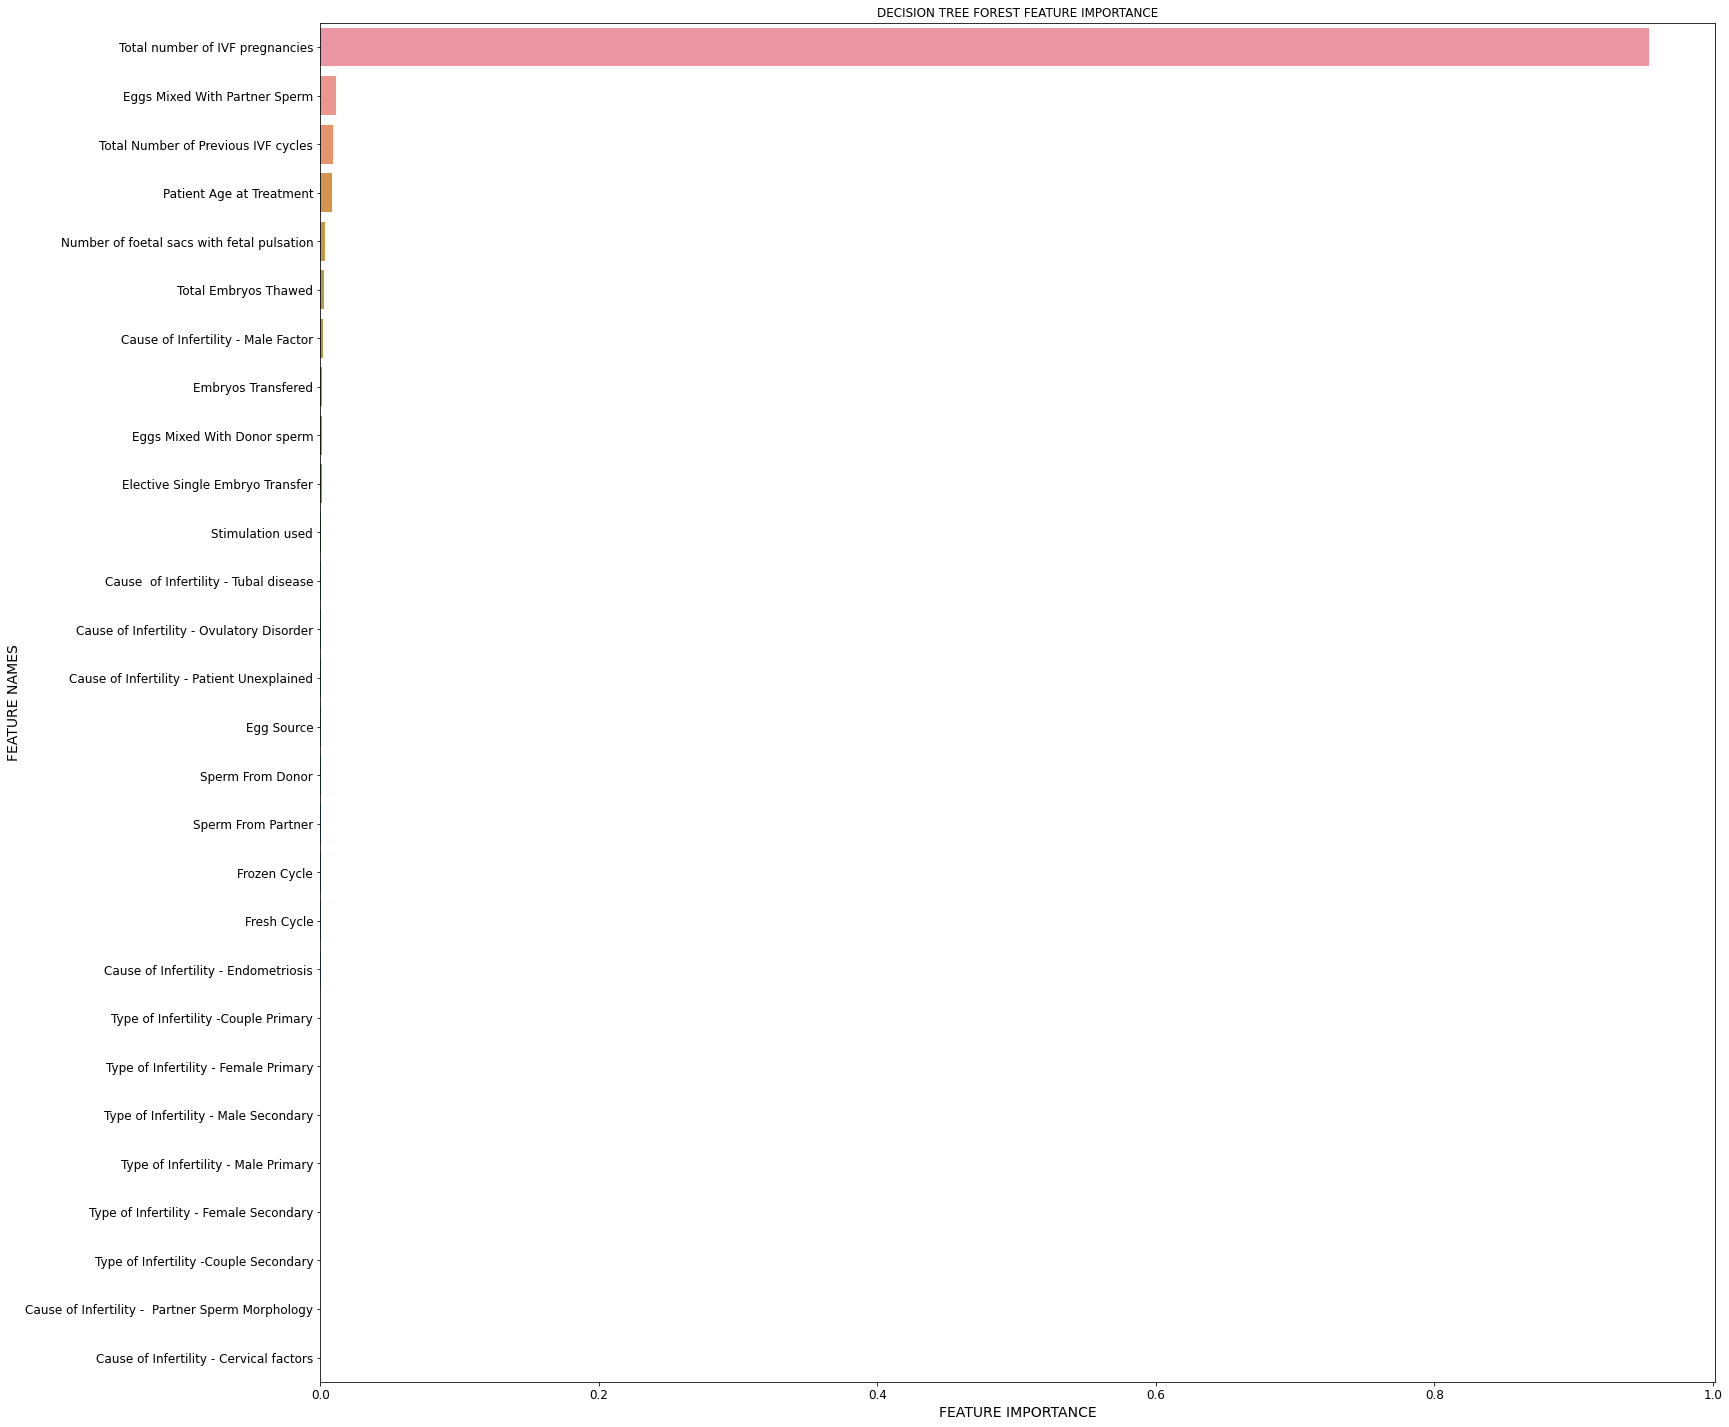

In [31]:
plot_feature_importance(dt.feature_importances_, X_train_smt.columns, 'DECISION TREE FOREST ')

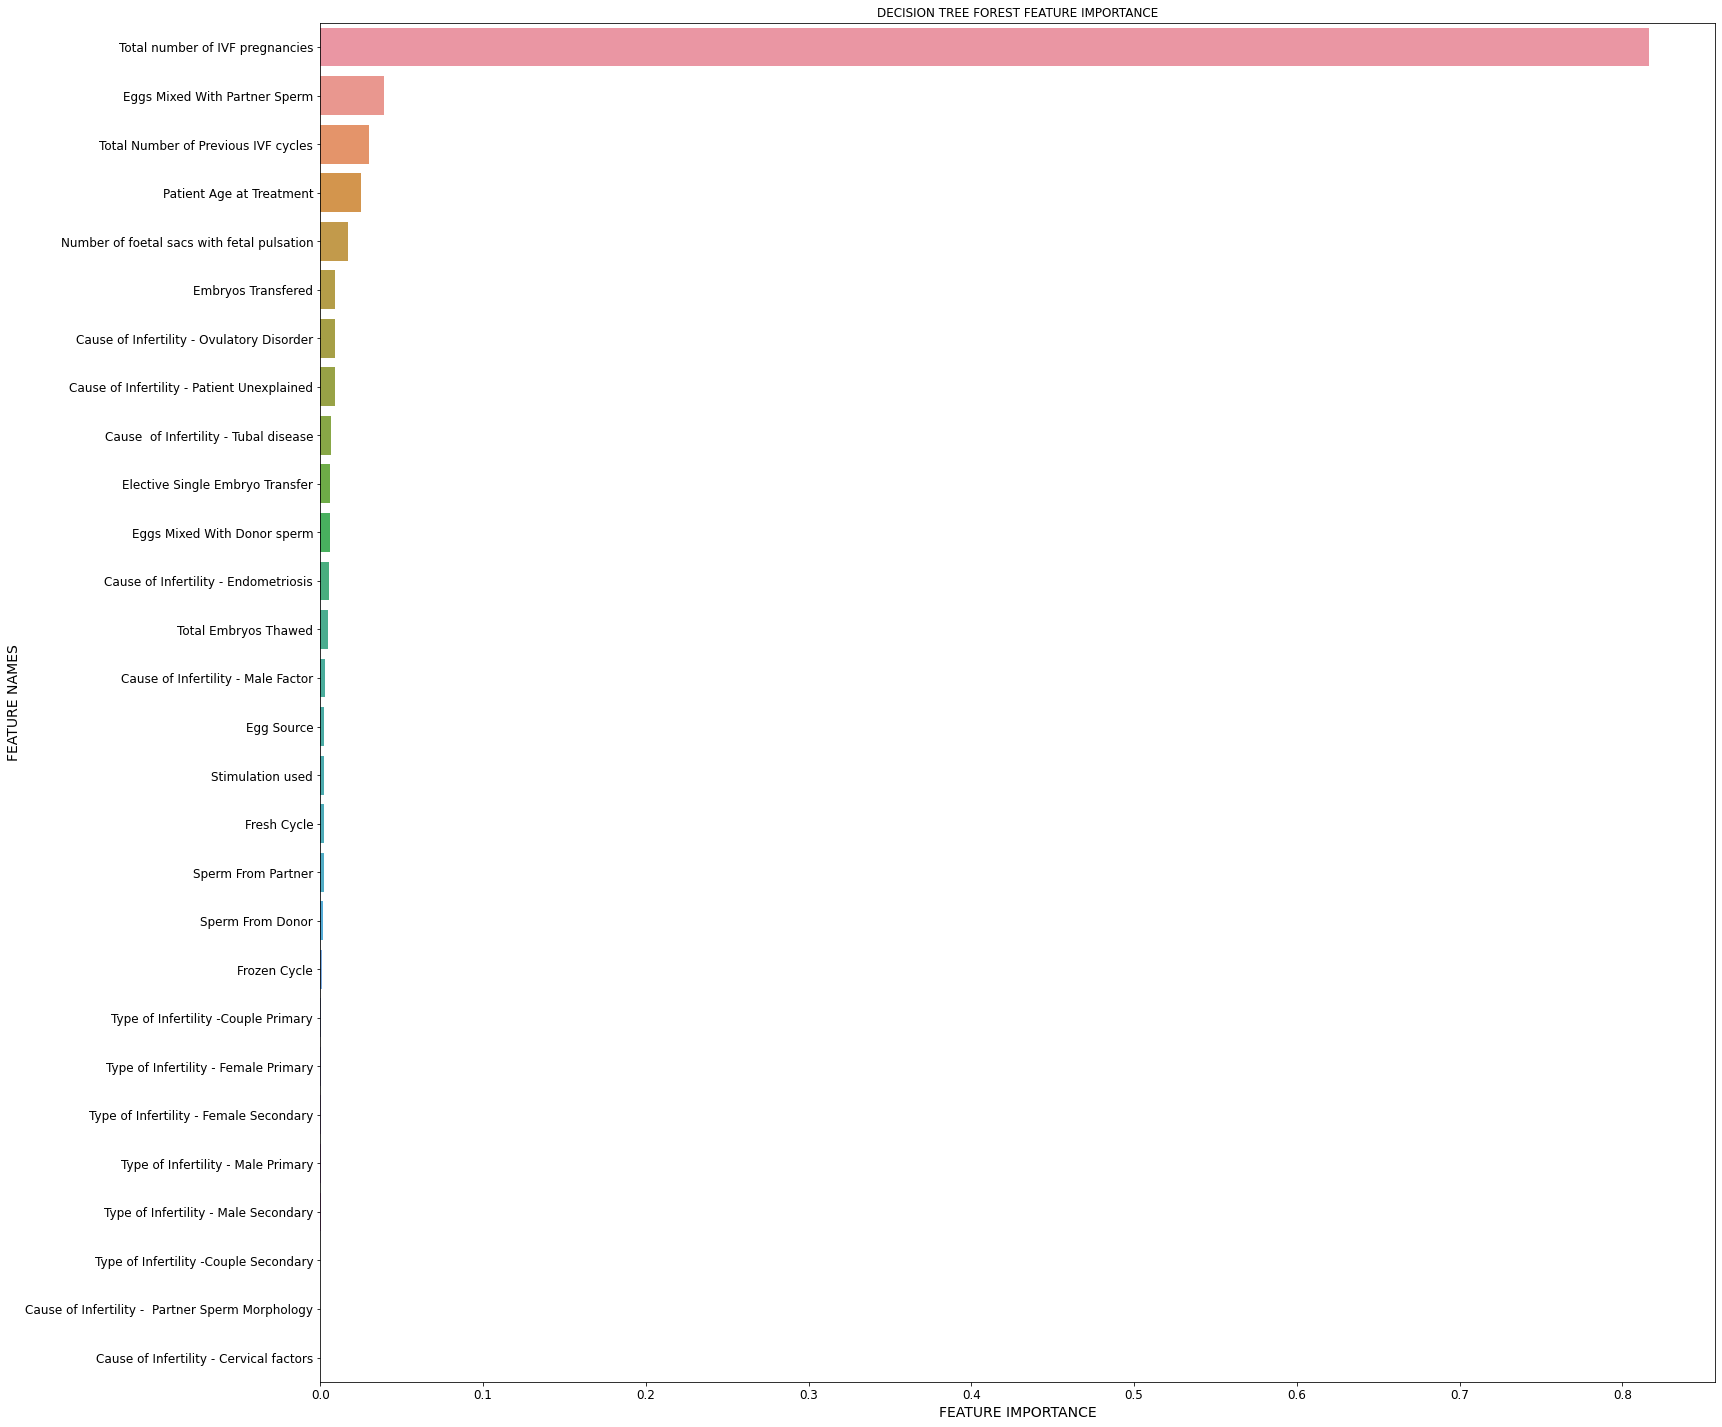

In [32]:
plot_feature_importance(dt2.feature_importances_, X_train.columns, 'DECISION TREE FOREST ')

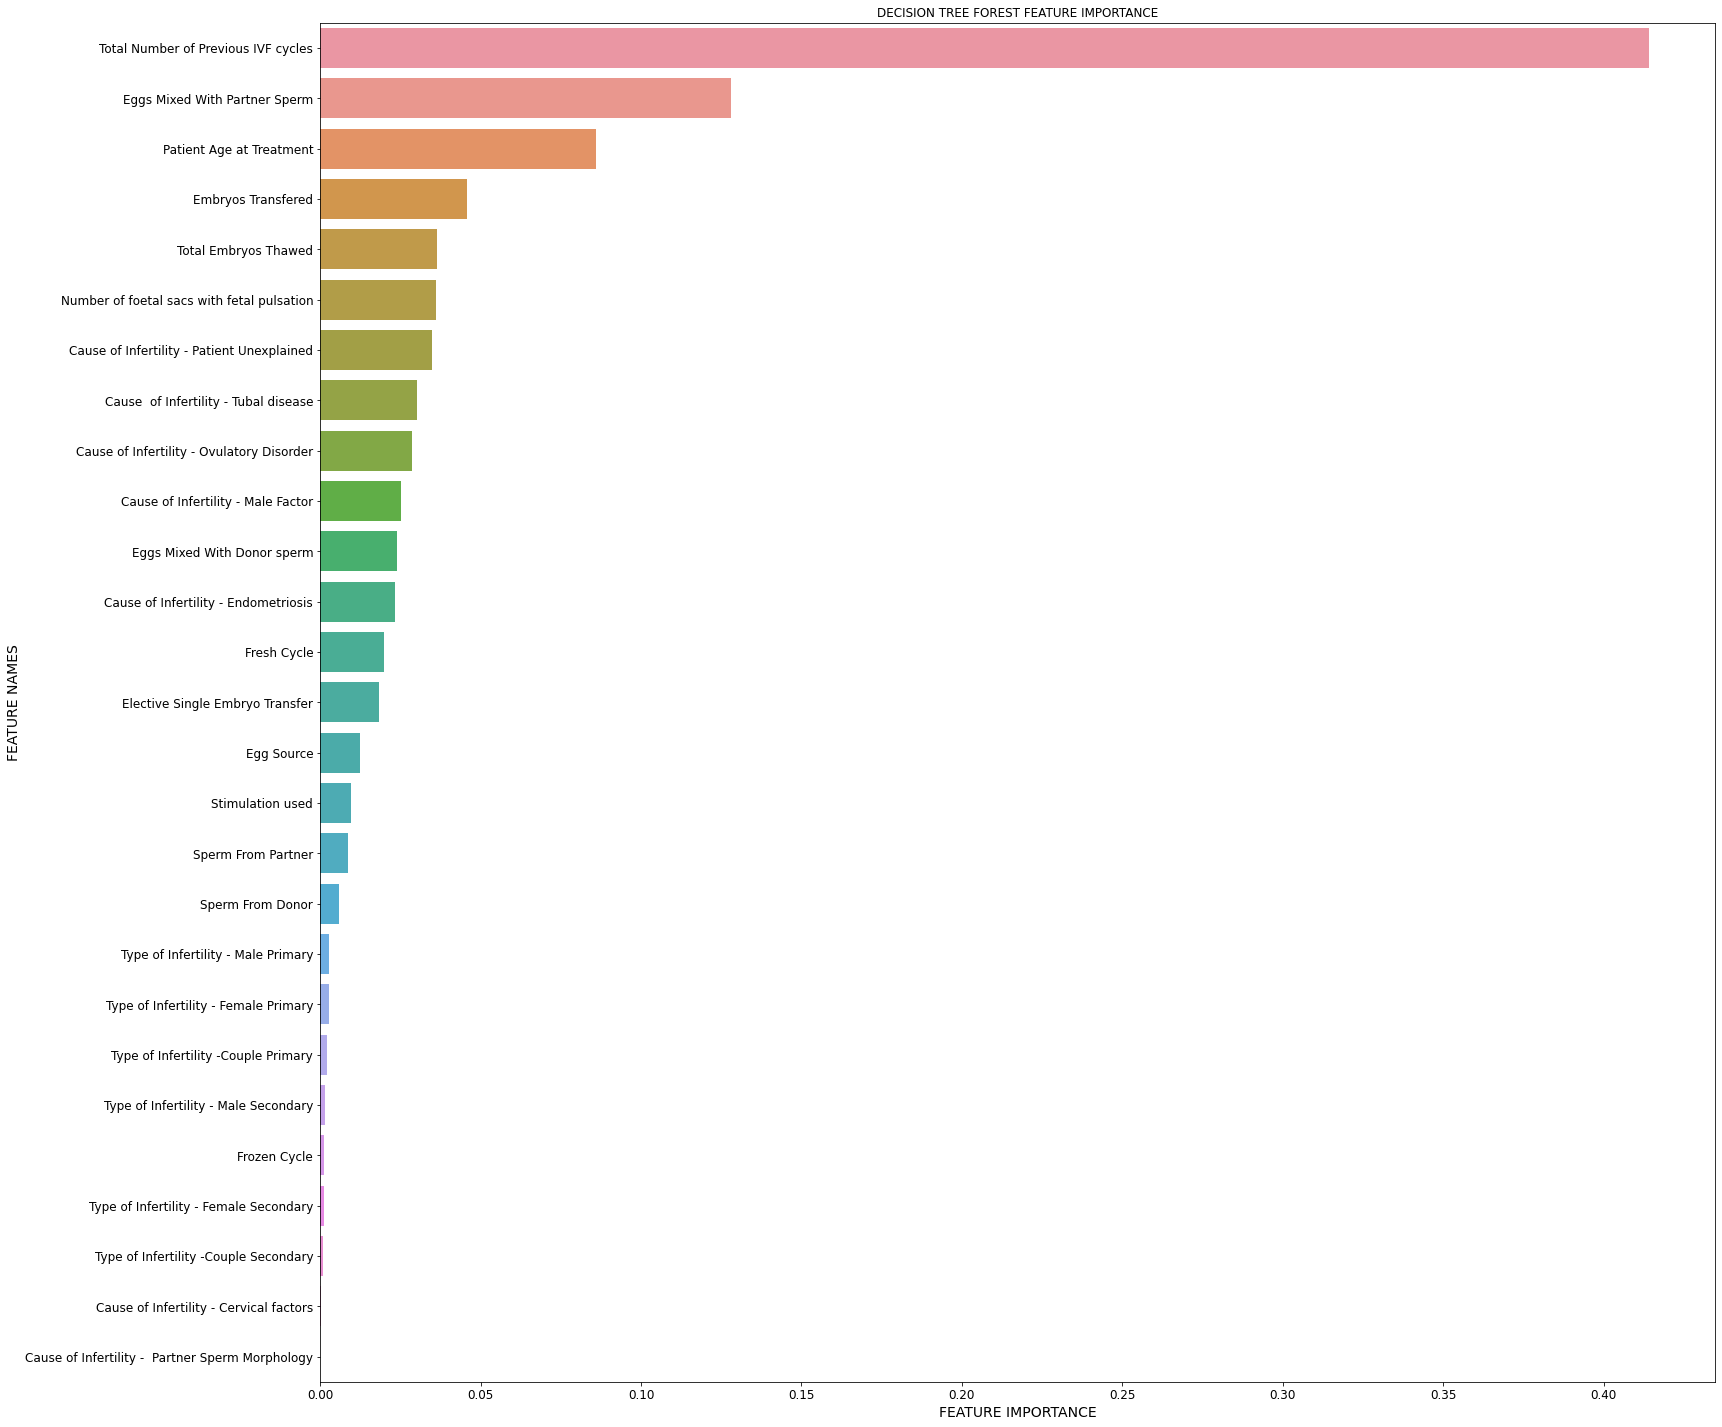

In [33]:
plot_feature_importance(dt3.feature_importances_, X_tn.columns, 'DECISION TREE FOREST ')

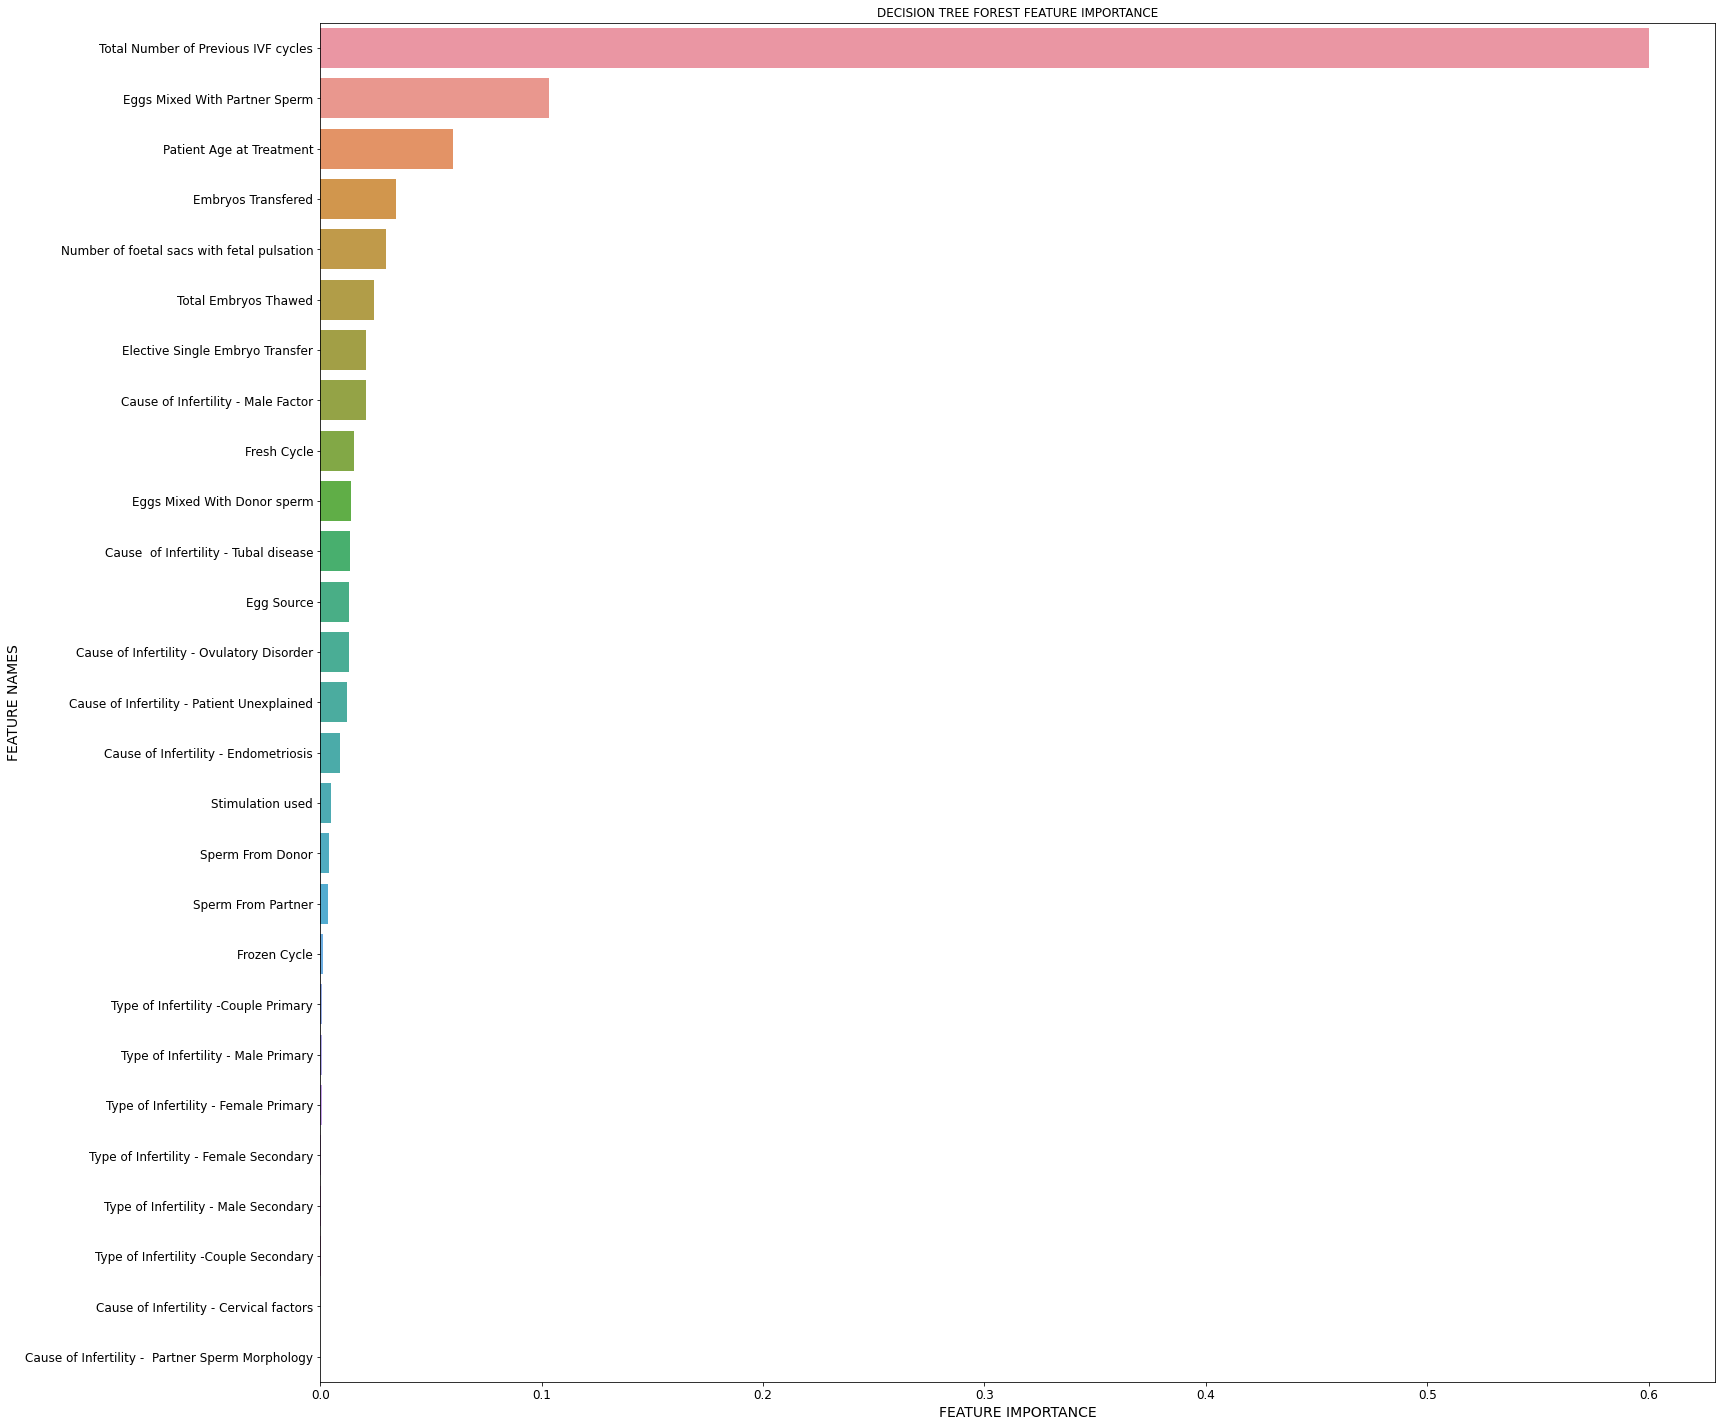

In [34]:
plot_feature_importance(dt7.feature_importances_, X_tn_smt.columns, 'DECISION TREE FOREST ')

In [36]:
# Logistic Regression for live births
pca = decomposition.PCA()
smt = SMOTE(random_state=42, sampling_strategy = 1.0)
log = LogisticRegression()
pipeline = Pipeline([('smt', smt), ('pca', pca), ('log', log)])
pipeline.fit(X_train, y_train) 
y_pred4 = pipeline.predict(X_test)
print('Confusion Matrix4:')
print(confusion_matrix(y_test, y_pred4))
print('Classification Report4:')
print(classification_report(y_test, y_pred4))

# Logistic Regression for pregnancy
pca2 = decomposition.PCA()
smt2 = SMOTE(random_state=42, sampling_strategy = 1.0)
log2 = LogisticRegression()
pipeline2 = Pipeline([('smt2', smt2), ('pca2', pca2), ('log2', log2)])
pipeline2.fit(X_tn, y_tn) 
y_pred5 = pipeline2.predict(X_tst)
print('Confusion Matrix5:')
print(confusion_matrix(y_tst, y_pred5))
print('Classification Report5:')
print(classification_report(y_tst, y_pred5))

Confusion Matrix4:
[[26246  1186]
 [    0  3773]]
Classification Report4:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27432
           1       0.76      1.00      0.86      3773

    accuracy                           0.96     31205
   macro avg       0.88      0.98      0.92     31205
weighted avg       0.97      0.96      0.96     31205

Confusion Matrix5:
[[20339  5917]
 [ 1167  3782]]
Classification Report5:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     26256
           1       0.39      0.76      0.52      4949

    accuracy                           0.77     31205
   macro avg       0.67      0.77      0.68     31205
weighted avg       0.86      0.77      0.80     31205



In [40]:
MLP = MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(20, 50, 70, 100, 70, 50, 20),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='sgd',
       tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [41]:
MLP.fit(X_train_smt, y_train_smt)

Iteration 1, loss = 0.42042487
Validation score: 0.977171
Iteration 2, loss = 0.37906126
Validation score: 0.977308
Iteration 3, loss = 0.17349037
Validation score: 0.603618
Iteration 4, loss = 0.37458774
Validation score: 0.977308
Iteration 5, loss = 0.20573549
Validation score: 0.977354
Iteration 6, loss = 0.13772853
Validation score: 0.977354
Iteration 7, loss = 0.13673200
Validation score: 0.977308
Iteration 8, loss = 0.13624579
Validation score: 0.977308
Iteration 9, loss = 0.13553919
Validation score: 0.977217
Iteration 10, loss = 0.13518998
Validation score: 0.977308
Iteration 11, loss = 0.13486120
Validation score: 0.977308
Iteration 12, loss = 0.13457136
Validation score: 0.977308
Iteration 13, loss = 0.13431662
Validation score: 0.977308
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 14, loss = 0.13316697
Validation score: 0.977171
Iteration 15, loss = 0.13306187
Validation score: 0.977171
Iterati

MLPClassifier(alpha=0.05, early_stopping=True,
              hidden_layer_sizes=(20, 50, 70, 100, 70, 50, 20),
              learning_rate='adaptive', max_iter=500, solver='sgd',
              verbose=True)

In [43]:
y_pred6 = MLP.predict(X_test)
print('Confusion Matrix6:')
print(confusion_matrix(y_test, y_pred6))
print('Classification Report6:')
print(classification_report(y_test, y_pred6))

Confusion Matrix6:
[[26244  1188]
 [    4  3769]]
Classification Report6:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27432
           1       0.76      1.00      0.86      3773

    accuracy                           0.96     31205
   macro avg       0.88      0.98      0.92     31205
weighted avg       0.97      0.96      0.96     31205

